# Praktikum Machine Learning Pertemuan 3


---


Yusuf Zaenul Mustofa \
24060122120021 \
C1 \


---




## PCA Dataset Iris

### Import Library yang Digunakan

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load Dataset Iris

In [22]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, names=['sepal length', 'sepal width', 'pedal length', 'pedal width', 'Class'])

### Standarisasi Data

In [23]:
features = ['sepal length', 'sepal width', 'pedal length', 'pedal width']
x = dataset.loc[:, features].values
y = dataset.loc[:, ['Class']].values
x = StandardScaler().fit_transform(x)

### Proyeksi PCA ke 2D

In [24]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [25]:
finalDF = pd.concat([principalDf, dataset[['Class']]], axis = 1)

#### Visualisasi Proyeksi 2D

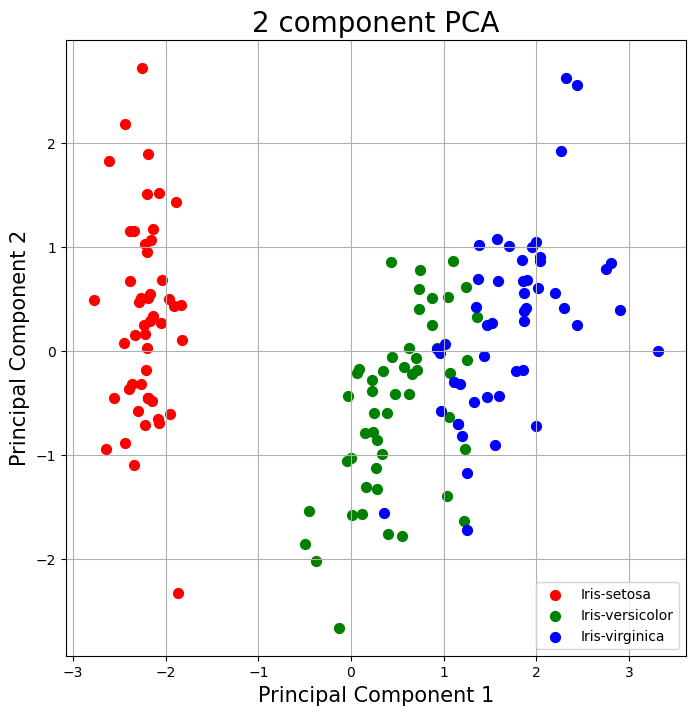

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Class'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'], finalDF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

### Varians yang Dijelaskan

In [27]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## PDA Dataset Cars

### Import Library yang Digunakan

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Load Dataset Cars

In [29]:
filename = 'cars_clus.csv'

data = pd.read_csv(filename, names=['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
                                   'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg'])

### Memilih Fitur Numerik

Memilih kolom numerik yang hanya relevan untuk PCA, kemudian dikonversikan menjadi tipe numerik dan menghapus baris dengan nilai yang hilang (NaN).

In [30]:
features = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap']
x = data[features].apply(pd.to_numeric, errors='coerce')
x_cleaned = x.dropna()

### Sinkronisasi Data

Sinkronisasi data digunakan untuk memastikan data asli hanya mencakup baris yang sesuai.

In [31]:
data_cleaned = data.loc[x_cleaned.index]

### Standarisasi Fitur

Standarisasi fitur digunakan untuk menstandarisasi data agar setiap fitur memiliki nilai rata-rata 0 dan standar deviasi 1.

In [32]:
x_scaled = StandardScaler().fit_transform(x_cleaned)

### Proyeksi PCA ke 2D

In [33]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

### Menambahkan Kolom Kategori

Ini bertujuan untuk menambahkan informasi kategori (type) ke hasil PCA untuk mempermudah interpretasi visualisasi.

In [34]:
principalDf['type'] = data_cleaned['type'].values

### Visualisasi Proteksi 2D

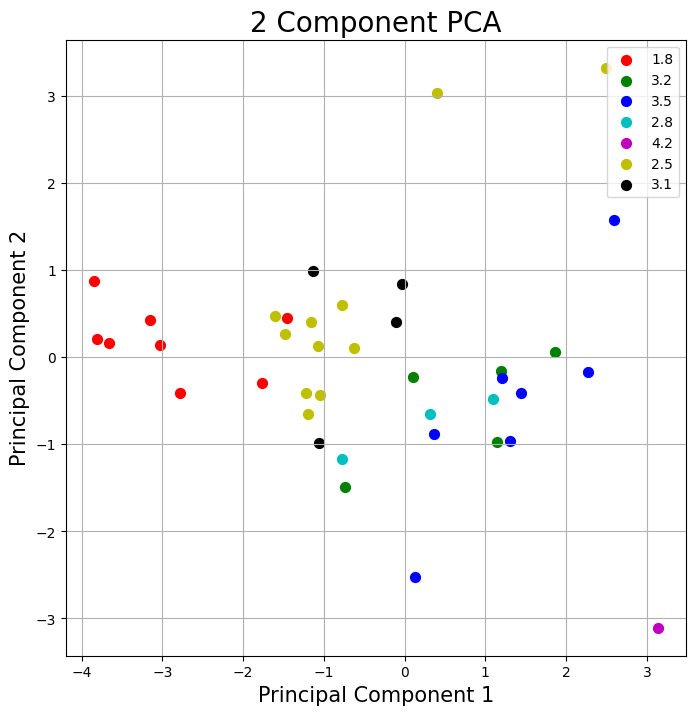

In [35]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

unique_types = principalDf['type'].unique()
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'][:len(unique_types)]
for target, color in zip(unique_types, colors):
    indicesToKeep = principalDf['type'] == target
    ax.scatter(
        principalDf.loc[indicesToKeep, 'principal component 1'],
        principalDf.loc[indicesToKeep, 'principal component 2'],
        c=color,
        s=50,
        label=target
    )
ax.legend(unique_types)
ax.grid()
plt.show()

### Varians yang Dijelaskan

In [36]:
pca.explained_variance_ratio_

array([0.52758327, 0.21452615])